# notebook for making simple vorticity snapshots

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import cmasher
%matplotlib inline
plt.rcParams["font.size"] = 14
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'Dejavu Serif'

In [15]:
# params
nx = 500
ny = 500
dx = 2000
dy = 2000
nxP1 = nx+1
nyP1 = ny+1

g = 9.81
rhoConst = 1029
f0 = 1.4e-4

conc = ["0", "100"]
loadLoc = "/scratch/hcm7920/amb"
saveLoc = "/home/hcm7920/experiments/arcticMiddepthBI/plots/"

ts = np.array([0,10,20,30])
levs = [0,8,16,24]
nSnapshots = len(ts)
nLevs = len(levs)

myCmap = cmasher.waterlily

In [16]:
# initialize arrays

vortSnapshots = np.zeros(shape=(len(conc), nSnapshots, nLevs, ny-1, nx-1))


In [17]:
# load data
    
for ic in range(len(conc)):
  data = nc.Dataset(loadLoc+conc[ic]+"/data/diagsSnapshots.nc")
  vortSnapshots[ic,:,:,:,:] = data["momVort3"][ts,levs,1:-1,1:-1]/f0

time = data["T"]
data = nc.Dataset(loadLoc+"0/data/state.nc")
depth = data["Z"]

In [18]:
# grid info
xGrid = np.linspace(-500,500,nx-1)
yGrid = np.linspace(-500,500,ny-1)

Text(0.5, 0.98, 'Halocline vorticity, max ice simulation')

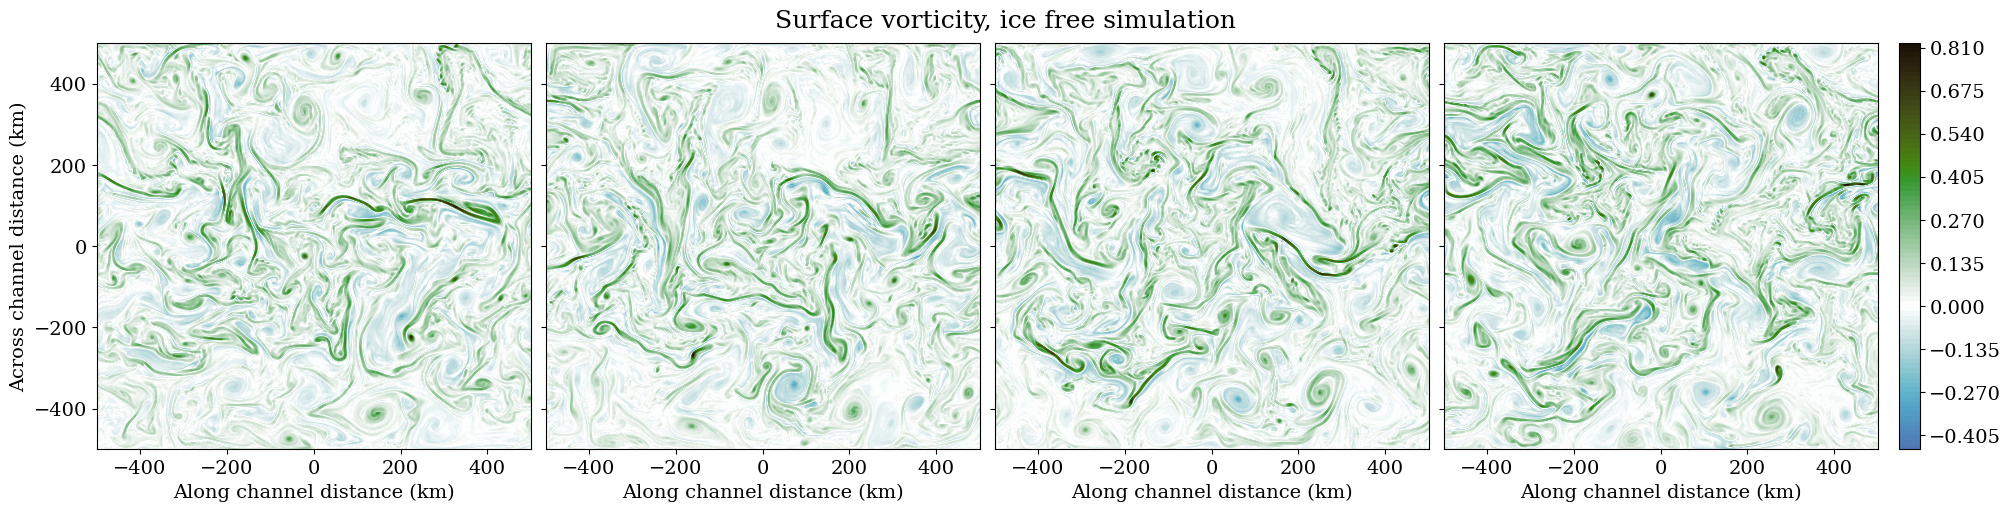

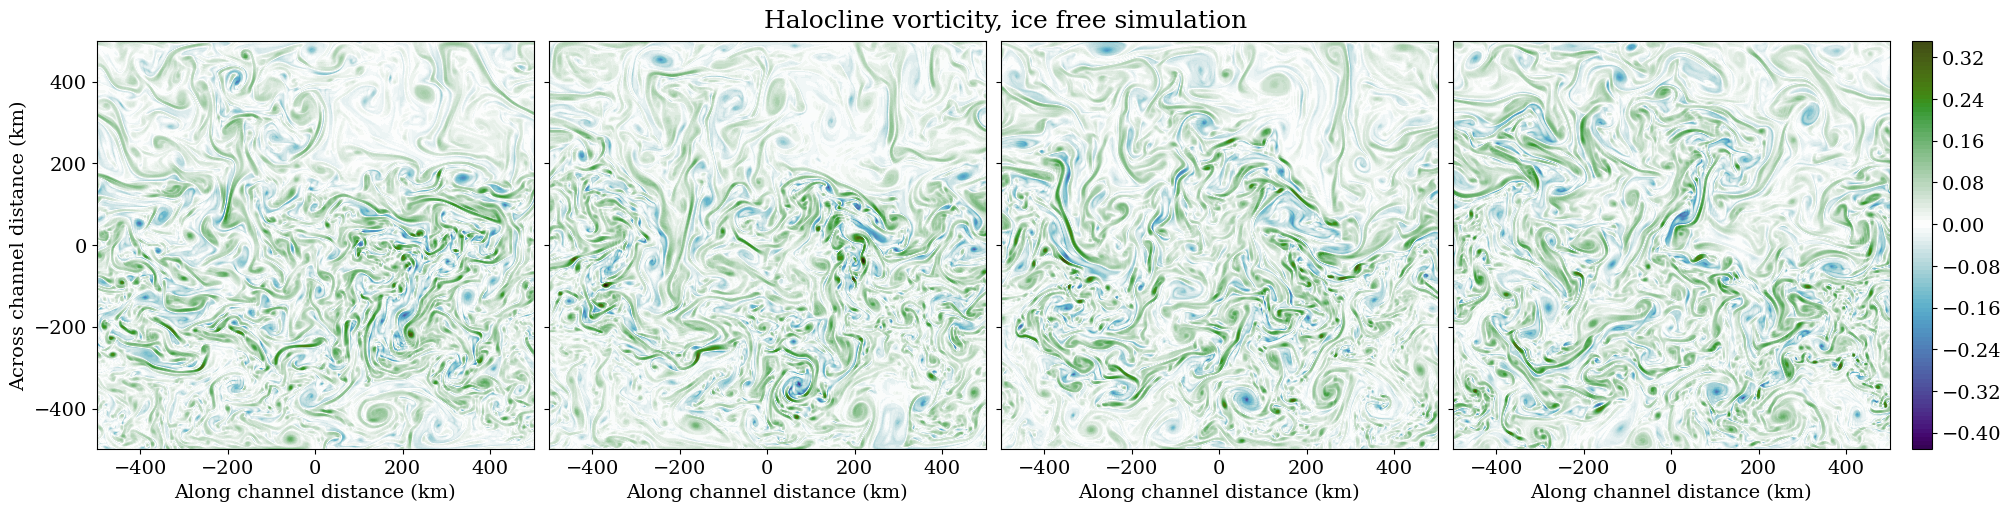

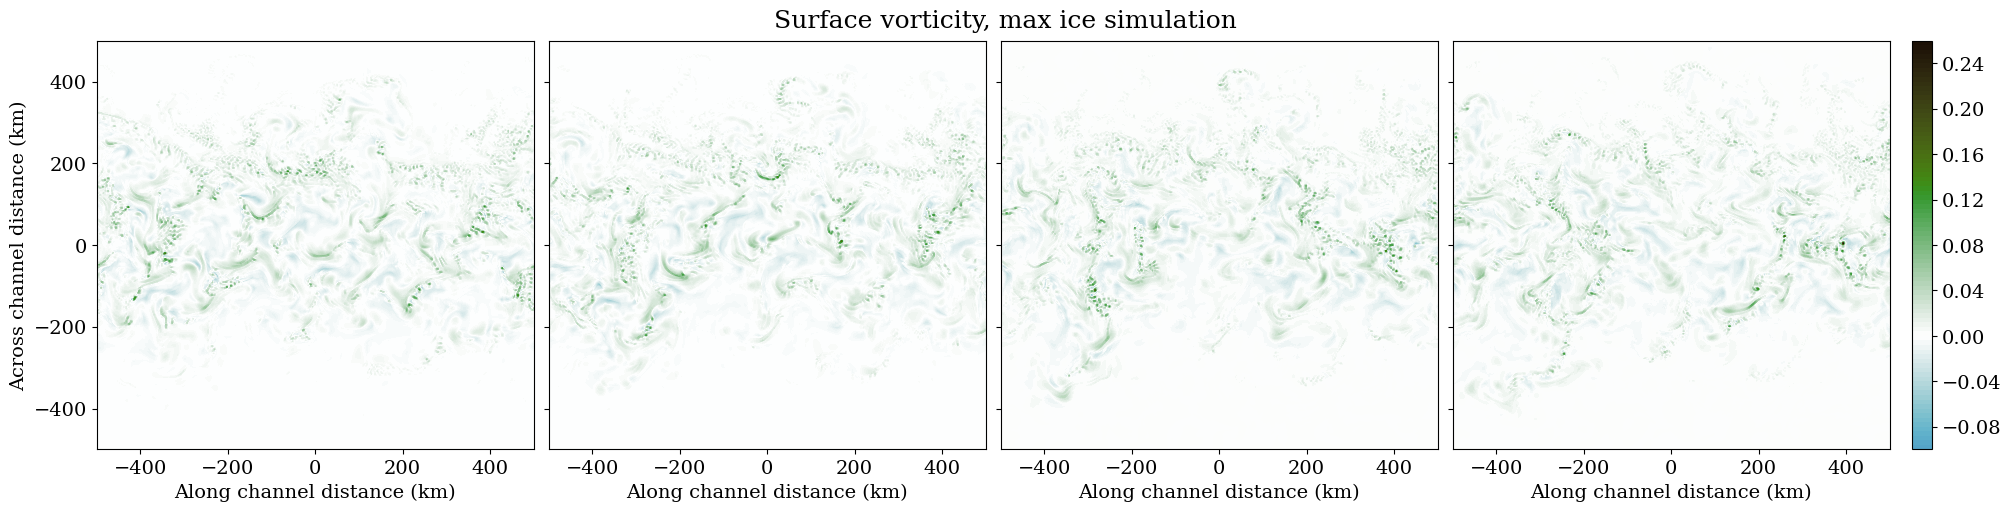

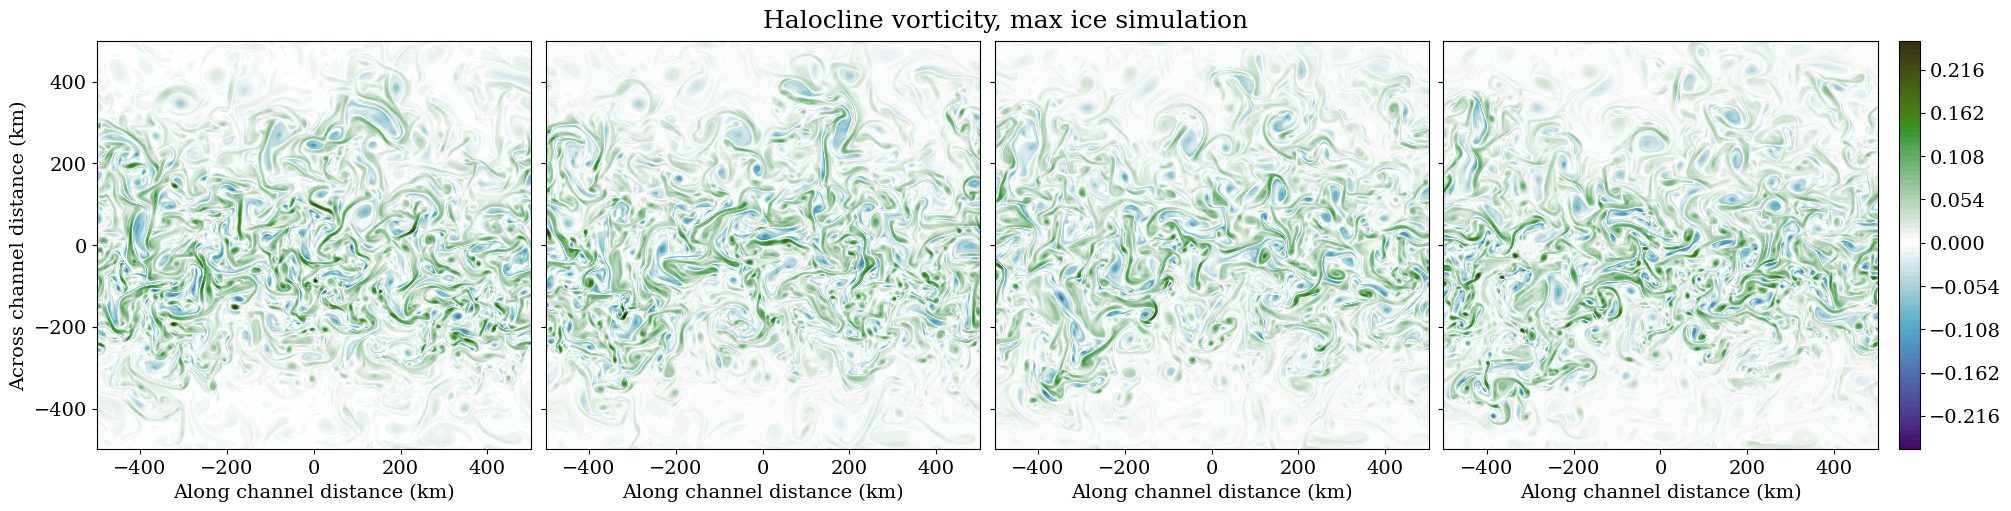

In [19]:

# figure for ice free, surface

myMax = abs(vortSnapshots[0,:,0,:,:]).max()

fig, axs = plt.subplots(1,4,figsize=(20,5),
                       sharey=True, layout="constrained")
for it in range(nSnapshots):
    im = axs[it].contourf(xGrid, yGrid, 
                          vortSnapshots[0,it,0,:,:],
                          100,
                          cmap=myCmap,
                          vmax=myMax, vmin=-myMax)
    axs[it].set_xlabel("Along channel distance (km)")

axs[0].set_ylabel("Across channel distance (km)")
cbar = plt.colorbar(im, ax=axs[3])
fig.suptitle("Surface vorticity, ice free simulation", fontsize=18)

# figure for ice free, at depth
myMax = abs(vortSnapshots[0,:,2,:,:]).max()

fig, axs = plt.subplots(1,4,figsize=(20,5),
                       sharey=True, layout="constrained")
for it in range(nSnapshots):
    im = axs[it].contourf(xGrid, yGrid, 
                          vortSnapshots[0,it,2,:,:],
                          100,
                          cmap=myCmap,
                          vmax=myMax, vmin=-myMax)
    axs[it].set_xlabel("Along channel distance (km)")

axs[0].set_ylabel("Across channel distance (km)")
cbar = plt.colorbar(im, ax=axs[3])
fig.suptitle("Halocline vorticity, ice free simulation", fontsize=18)

# figure for max ice, at surface
myMax = abs(vortSnapshots[1,:,0,:,:]).max()

fig, axs = plt.subplots(1,4,figsize=(20,5),
                       sharey=True, layout="constrained")
for it in range(nSnapshots):
    im = axs[it].contourf(xGrid, yGrid, 
                          vortSnapshots[1,it,0,:,:],
                          100,
                          cmap=myCmap,
                          vmax=myMax, vmin=-myMax)
    axs[it].set_xlabel("Along channel distance (km)")

axs[0].set_ylabel("Across channel distance (km)")
cbar = plt.colorbar(im, ax=axs[3])
fig.suptitle("Surface vorticity, max ice simulation", fontsize=18)

# figure for ice free, at depth
myMax = abs(vortSnapshots[1,:,2,:,:]).max()

fig, axs = plt.subplots(1,4,figsize=(20,5),
                       sharey=True, layout="constrained")
for it in range(nSnapshots):
    im = axs[it].contourf(xGrid, yGrid, 
                          vortSnapshots[1,it,2,:,:],
                          100,
                          cmap=myCmap,
                          vmax=myMax, vmin=-myMax)
    axs[it].set_xlabel("Along channel distance (km)")

axs[0].set_ylabel("Across channel distance (km)")
cbar = plt.colorbar(im, ax=axs[3])
fig.suptitle("Halocline vorticity, max ice simulation", fontsize=18)


Text(0.5, 0, 'Along channel distance (km)')

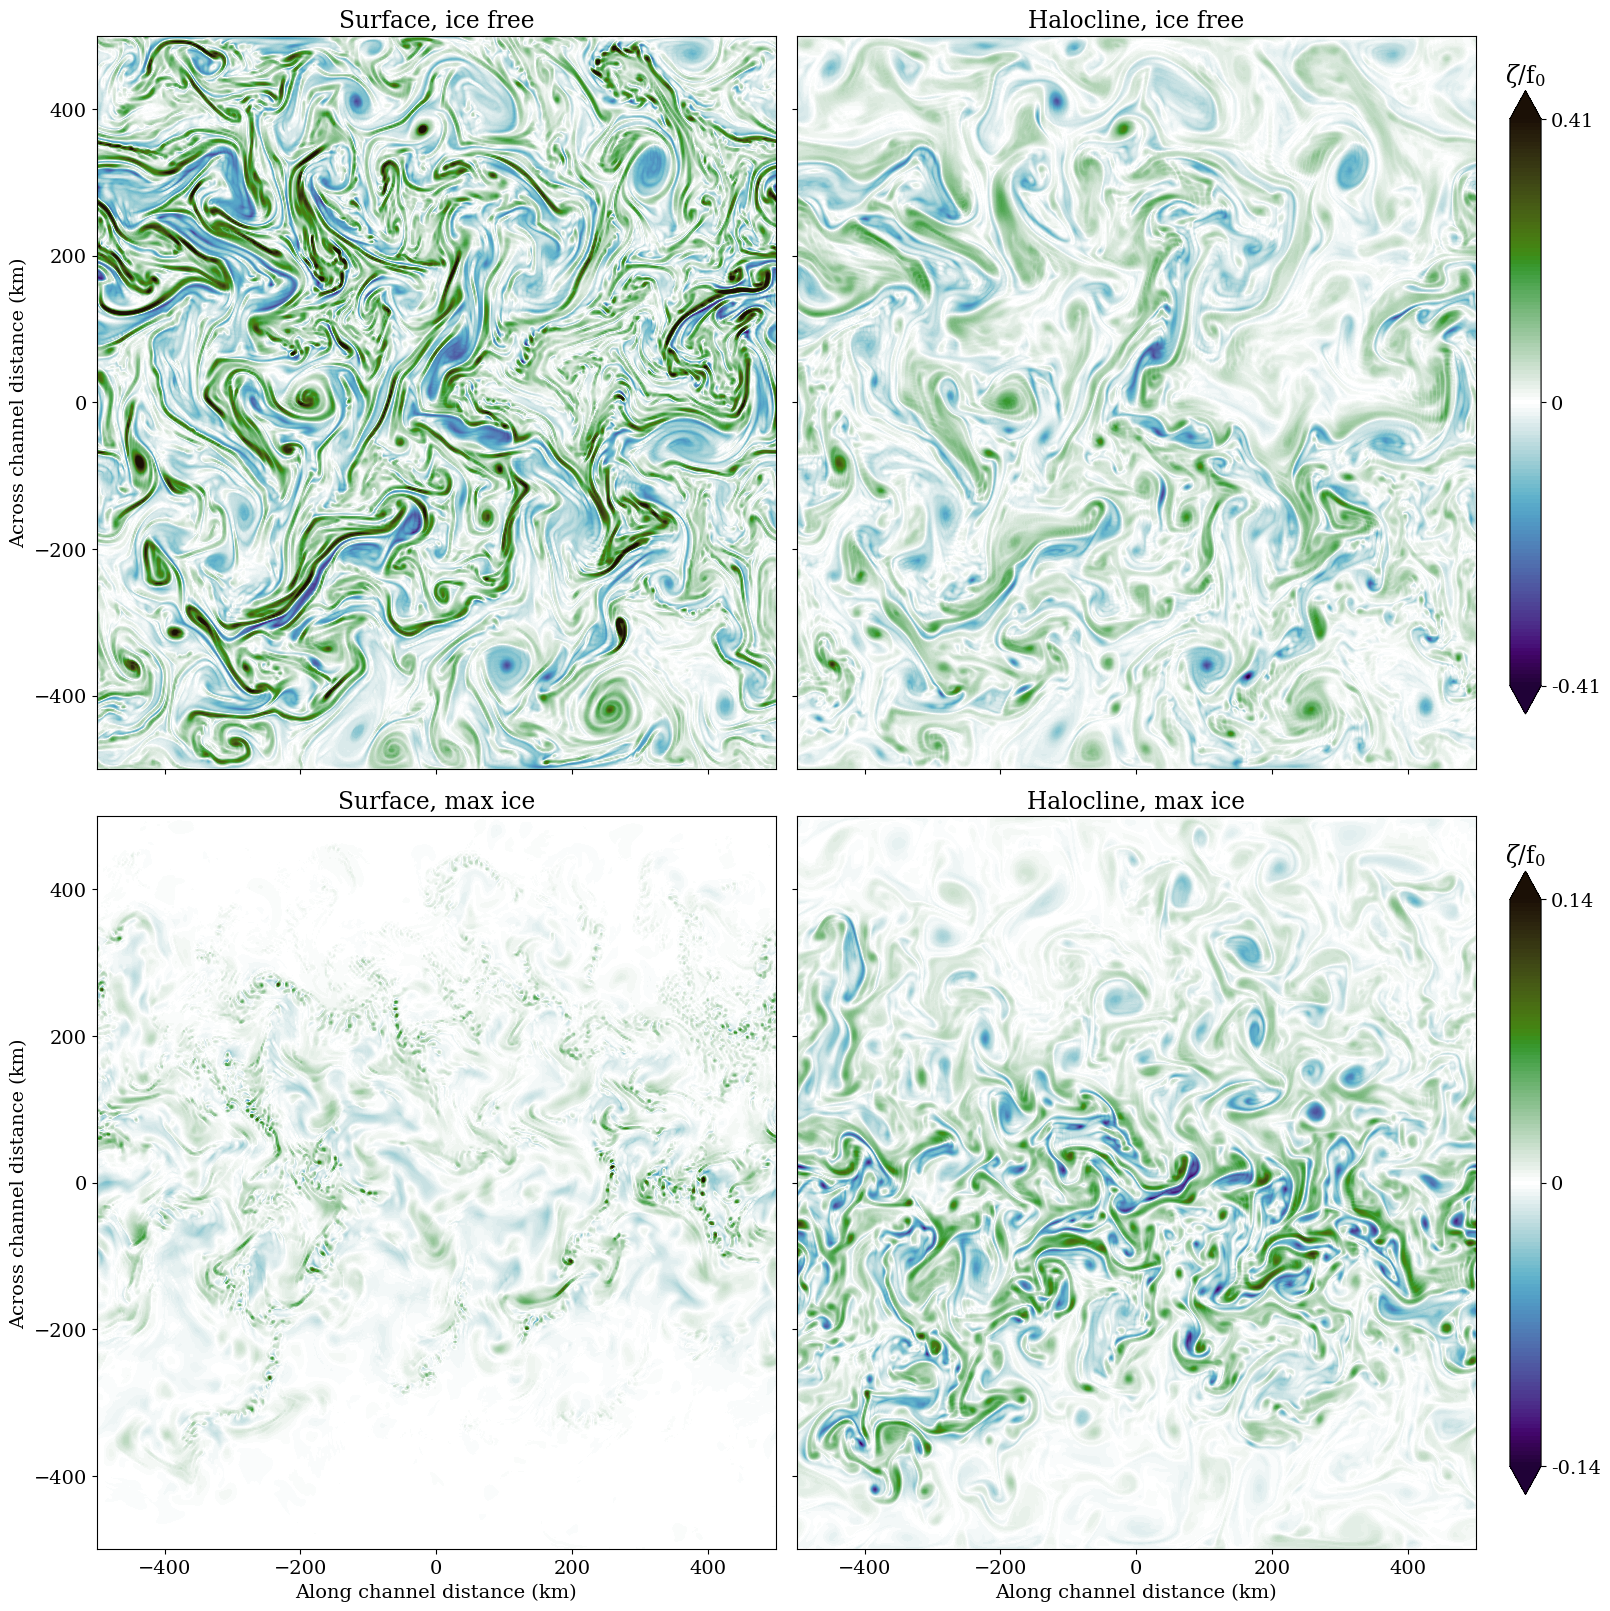

In [20]:
# panel of four snapshots, each from different runs

fig, axs = plt.subplots(2,2,figsize=(16,16), 
                        sharey=True, sharex=True,
                        layout="constrained")

iceMax = abs(vortSnapshots[1,:,:,:,:]).max()*0.5
freeMax = abs(vortSnapshots[0,:,:,:,:]).max()*0.5
iceContourLevs = np.linspace(-iceMax, iceMax, 150)
freeContourLevs = np.linspace(-freeMax, freeMax, 150)

im1 = axs[0,0].contourf(xGrid, yGrid, 
                        vortSnapshots[0,it,0,:,:],
                        freeContourLevs,
                        cmap=myCmap, extend='both')
im2 = axs[0,1].contourf(xGrid, yGrid, 
                        vortSnapshots[0,it,1,:,:],
                        freeContourLevs,
                        cmap=myCmap, extend='both')
im3 = axs[1,0].contourf(xGrid, yGrid, 
                        vortSnapshots[1,it,0,:,:],
                        iceContourLevs,
                        cmap=myCmap, extend='both')
im4 = axs[1,1].contourf(xGrid, yGrid, 
                        vortSnapshots[1,it,1,:,:],
                        iceContourLevs,
                        cmap=myCmap, extend='both')

cbar1 = plt.colorbar(im1, ax=axs[0,1],
                     shrink=0.85,
                     ticks=[-freeMax,0,freeMax])
cbar2 = plt.colorbar(im3, ax=axs[1,1],
                     shrink=0.85,
                     ticks=[-iceMax,0,iceMax])

cbar1.ax.set_yticklabels([str(-freeMax.round(2)), "0", str(freeMax.round(2))])
cbar2.ax.set_yticklabels([str(-iceMax.round(2)), "0", str(iceMax.round(2))])
cbar1.ax.set_title("$\zeta / \mathrm{f}_0$")
cbar2.ax.set_title("$\zeta / \mathrm{f}_0$")

axs[0,0].set_title("Surface, ice free")
axs[0,1].set_title("Halocline, ice free")
axs[1,0].set_title("Surface, max ice")
axs[1,1].set_title("Halocline, max ice")

axs[0,0].set_ylabel("Across channel distance (km)")
axs[1,0].set_ylabel("Across channel distance (km)")
axs[1,0].set_xlabel("Along channel distance (km)")
axs[1,1].set_xlabel("Along channel distance (km)")

# plt.savefig(saveLoc+"officialFigs/figVortSnapshots.pdf",
#             format="pdf", bbox_inches='tight')
# plt.savefig(saveLoc+"officialFigs/figVortSnapshots.png",
#             format="png", bbox_inches='tight')

ts index = 115


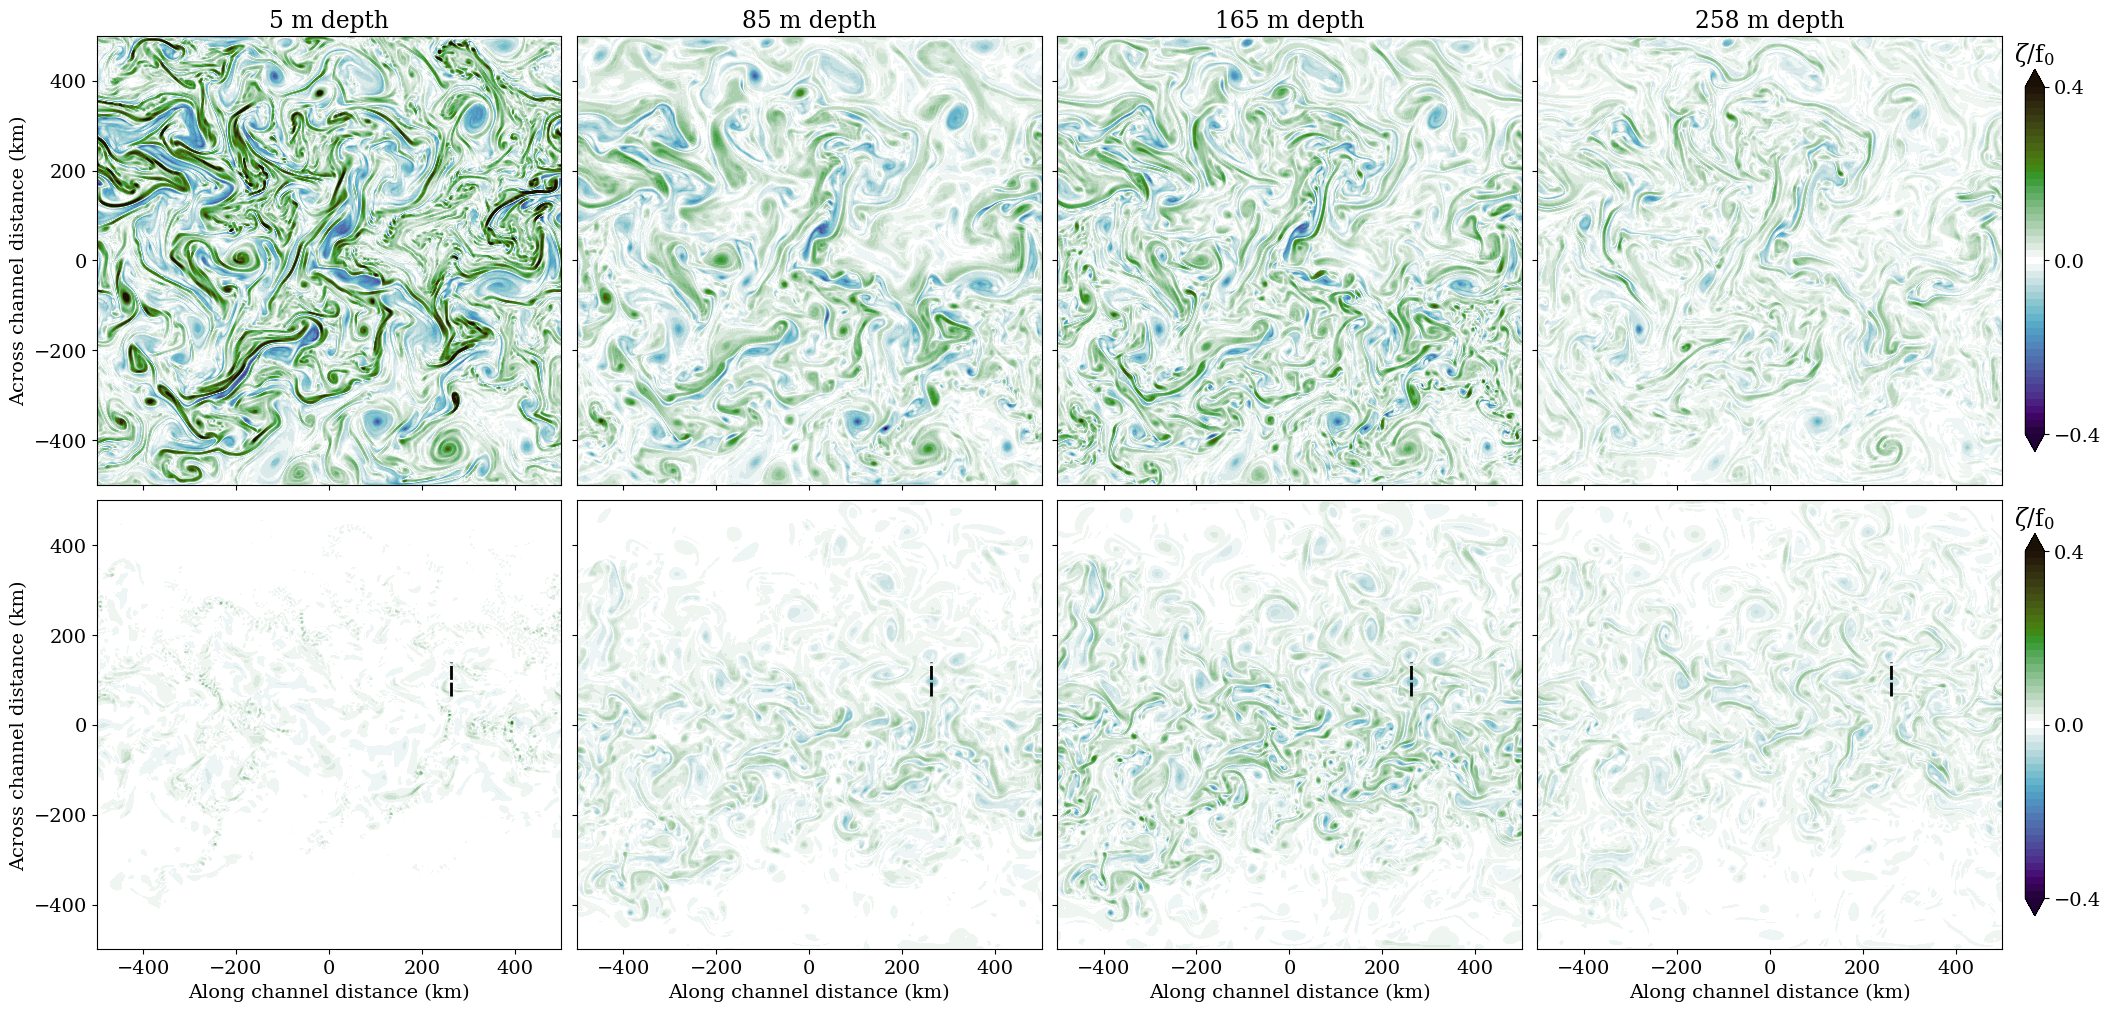

In [30]:
# panel of eight snapshots, twice as many depths as the above figure

# print the index of the selected ts
print(f"ts index = {ts[3]}")

fig, axs = plt.subplots(2,4,figsize=(21,10), 
                        sharey=True, sharex=True,
                        layout="constrained")

iceMax = abs(vortSnapshots[1,:,:,:,:]).max()*0.5
freeMax = abs(vortSnapshots[0,:,:,:,:]).max()*0.5

iceContourLevs = np.linspace(-iceMax, iceMax, 50)
freeContourLevs = np.linspace(-freeMax, freeMax, 50)
comboContourLevs = np.linspace(-0.4,0.4,50)

for iz in range(4):
    im1 = axs[0,iz].contourf(xGrid,yGrid,
                             vortSnapshots[0,3,iz,:,:],
                             comboContourLevs,
                             extend="both", cmap=myCmap)
    axs[0,iz].set_title(f"{-depth[levs[iz]].round(0).astype(int)} m depth")
    # axs[0,iz].vlines(-2,250,450,
    #                 colors="black", linewidth=3,
    #                 linestyles=(0, (5, 1)))

for iz in range(4):
    im3 = axs[1,iz].contourf(xGrid,yGrid,
                             vortSnapshots[1,3,iz,:,:],
                             comboContourLevs,
                             extend="both", cmap=myCmap)
    axs[1,iz].set_xlabel("Along channel distance (km)")
    axs[1,iz].vlines(262,65,140,
                    colors="black", linewidth=2,
                    linestyles=(0, (5, 1)))

cbar1 = plt.colorbar(im1, ax=axs[0,3],
                     shrink=0.85,
                     ticks=[-0.4,0,0.4])
cbar2 = plt.colorbar(im3, ax=axs[1,3],
                     shrink=0.85,
                     ticks=[-0.4,0,0.4])

# cbar1.ax.set_yticklabels([str(-freeMax.round(2)), "0", str(freeMax.round(2))])
# cbar2.ax.set_yticklabels([str(-iceMax.round(2)), "0", str(iceMax.round(2))])
cbar1.ax.set_title("$\zeta / \mathrm{f}_0$")
cbar2.ax.set_title("$\zeta / \mathrm{f}_0$")

axs[0,0].set_ylabel("Across channel distance (km)")
axs[1,0].set_ylabel("Across channel distance (km)")

# plt.savefig(saveLoc+"officialFigs/figVortSnapshots.pdf",
            # format="pdf", bbox_inches='tight')
plt.savefig(saveLoc+"officialFigs/figVortSnapshots.png",
            format="png", bbox_inches='tight')


In [22]:
vortSnapshots[1,1,-1,:,:].mean()

2.23171362364254e-06